In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import re

In [3]:
output = load('hists_ttcom_dummy_sample_old.coffea')

btagCMVA btagCSVV2


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


btagDeepB btagDeepC


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: divide by zero encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:39: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw !=

btagDeepFlavB btagDeepFlavC


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: divide by zero encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:39: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


KeyboardInterrupt: 

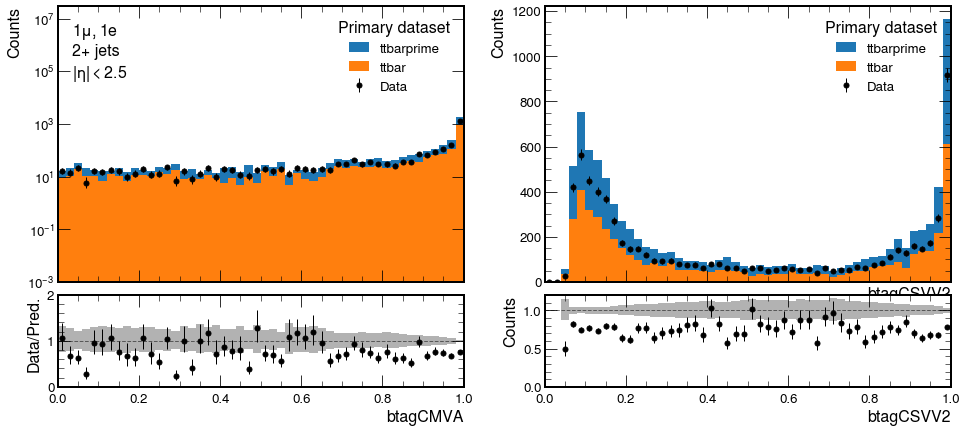

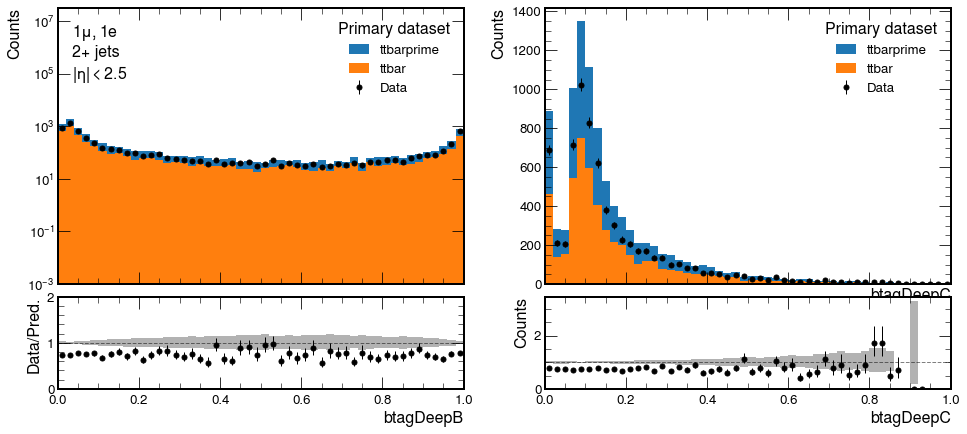

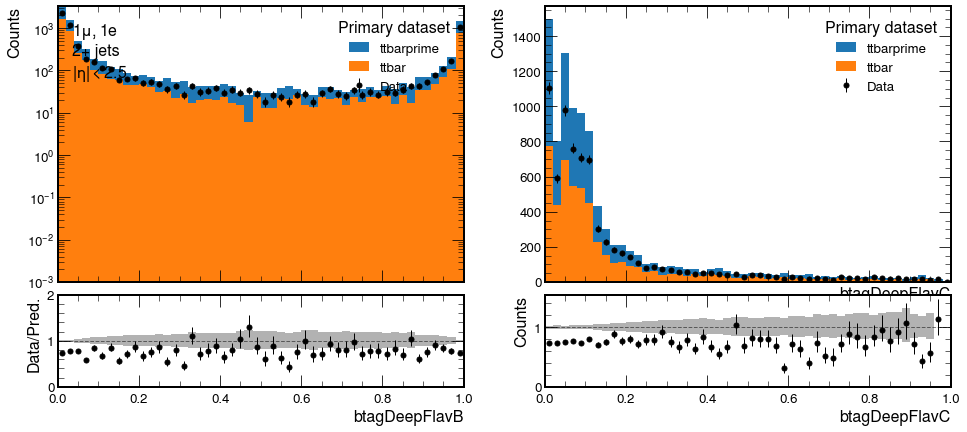

In [4]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
    fig, ((ax1, ax2),(rax1, rax2)) = plt.subplots(2, 2, figsize=(16, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    print(h1name, h2name)
    h1 = output[h1name]
    h2 = output[h2name]
    # if True: normalize histo to 1
    dense = False

    for ax, rax, h in zip([ax1, ax2], [rax1, rax2], [h1, h2]):
        # scale MC samples according to lumi (for now, dummy scale)
        scales = {
            'ttbar': 1.0,
            'ttbarprime':1.0
        }
        h.scale(scales,axis='dataset')   
        notdata = re.compile('(?!Data)')
        if hasattr(h, 'dim'):
            plot.plot1d(h[notdata], ax=ax, legend_opts={'loc':1,()}, density=dense, stack=True, clear=False);
            plot.plot1d(h["Data"], ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);
            # now we build the ratio plot
            plot.plotratio(
                   num=h["Data"].sum("dataset"),
                    denom=h[notdata].sum("dataset"),
                    ax=rax,
                    error_opts=data_err_opts,
                    denom_fill_opts={},
                    guide_opts={},
                    unc='num'
                )
        else:
            continue    
        #break
    for ax, rax, hname in zip([ax1], [rax1], [h1name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        ax.set_ylim(0.001, None)
        if hname.startswith("btag") or hname.startswith("DeepCSV_trackDecayLenVal"):
            ax.semilogy()
        rax.set_ylabel('Data/Pred.')
        rax.set_ylim(0,2)
        ax.set_xlabel(None)
        
    hep.mpl_magic(ax1)
#     hep.mpl_magic(ax2)
